## Preprocessing - załadowanie danych, przygotowanie danych, analiza rozkładu zmiennych, standardyzacja, ekstrakcja cech

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/data.csv')
df = df.drop(['Mild', 'Mod', 'Sev'], axis=1)
df

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,mild,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,severe,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,mild,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,mild,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,mild,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,mild,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,severe,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,mild,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,mild,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [3]:
col_names = []
for col in df.columns:
    col_names.append(col)
    
col_mapper = {i: f'{col_names[i]}' for i in range(0, 12)}
col_mapper

{0: 'Severity',
 1: 'Age',
 2: 'BMI',
 3: 'CSA',
 4: 'PB',
 5: 'Duration',
 6: 'NRS',
 7: 'Sex',
 8: 'Side',
 9: 'Diabetes',
 10: 'NP',
 11: 'Weakness'}

Należy przemapować kolumny Severity	Mild Mod Sev do wartości typu integer aby można było prawidłowo przeprowadzić standardyzację i dalsze operacje uczenia.

In [4]:
print(df['Severity'].unique())

['mild' 'severe' 'moderate']


In [5]:
# Severenity: mild - 0, moderate - 1, severe - 1
# Mild: mild - 0, others - 1
# Mod: moderate - 0, others - 1
# Sev: severe - 0, others - 1

df_adjusted = df

df_adjusted["Severity"].replace({"mild": 0, "moderate": 1, "severe": 2}, inplace=True)
# df_adjusted["Mild"].replace({"mild": 0, "others": 1}, inplace=True)
# df_adjusted["Mod"].replace({"moderate": 0, "others": 1}, inplace=True)
# df_adjusted["Sev"].replace({"severe": 0, "others": 1}, inplace=True)

df_adjusted
        


,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,2,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,0,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,0,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,0,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,2,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,0,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,0,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [6]:
for i in range (1037):
    df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
    df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
    df_adjusted['PB'][i] = df_adjusted['PB'][i].replace(',', '.')

df_adjusted

C:\Users\Dodo\AppData\Local\Temp/ipykernel_12688/1510437294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
C:\Users\Dodo\AppData\Local\Temp/ipykernel_12688/1510437294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
C:\Users\Dodo\AppData\Local\Temp/ipykernel_12688/1510437294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.09375,10,1.9,3,2,1,1,0,0,0
1,2,68,20.41522491,13,1.8,12,6,0,0,0,0,0
2,0,68,20.41522491,13,1.5,12,3,0,1,0,0,0
3,0,63,28.5075216,13,2.9,1,4,1,1,0,0,0
4,0,87,22.93975069,12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.18934911,11,1.8,2,3,1,1,0,0,0
1033,2,49,24.19649379,16,3.1,8,5,1,0,0,1,1
1034,0,41,23.80869017,12,1.7,4,4,0,0,0,0,0
1035,0,67,26.98600101,11,3.9,8,3,1,1,0,0,0


In [7]:
df_adjusted['BMI'] = df_adjusted['BMI'].astype(float)
df_adjusted['CSA'] = df_adjusted['CSA'].astype(float)
df_adjusted['PB'] = df_adjusted['PB'].astype(float)

### Analiza danych - parametry statystyczne, rozkład zmiennych, macierz korelacji, boxploty

In [8]:
df.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Severity  1037 non-null   int64  
 1   Age       1037 non-null   int64  
 2   BMI       1037 non-null   float64
 3   CSA       1037 non-null   float64
 4   PB        1037 non-null   float64
 5   Duration  1037 non-null   int64  
 6   NRS       1037 non-null   int64  
 7   Sex       1037 non-null   int64  
 8   Side      1037 non-null   int64  
 9   Diabetes  1037 non-null   int64  
 10  NP        1037 non-null   int64  
 11  Weakness  1037 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 97.3 KB


In [9]:
df.describe()

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.756027,57.950820,24.756429,15.152266,2.468910,8.274831,4.395371,0.609450,0.492768,0.140791,0.439730,0.187078
std,0.821569,10.821583,3.416702,4.304797,1.827584,9.589684,1.842206,0.488109,0.500189,0.347973,0.496594,0.390162
min,0.000000,19.000000,17.632653,7.000000,0.210000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,51.000000,22.432303,12.000000,1.700000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,58.000000,24.337480,14.000000,2.200000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,65.000000,26.729927,17.000000,2.900000,12.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,87.000000,42.598077,37.000000,40.000000,60.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Dodo\AppData\Local\Temp/ipykernel_12688/448109982.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, bins=5);


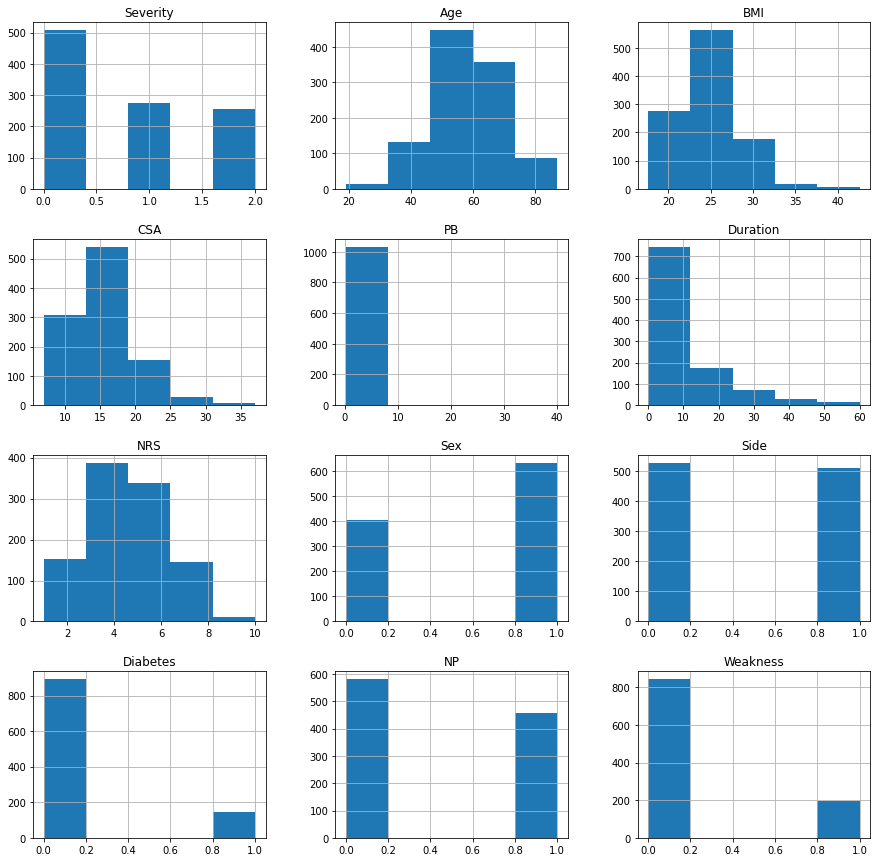

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df.hist(ax=ax, bins=5);
fig.savefig('hist-std.png')

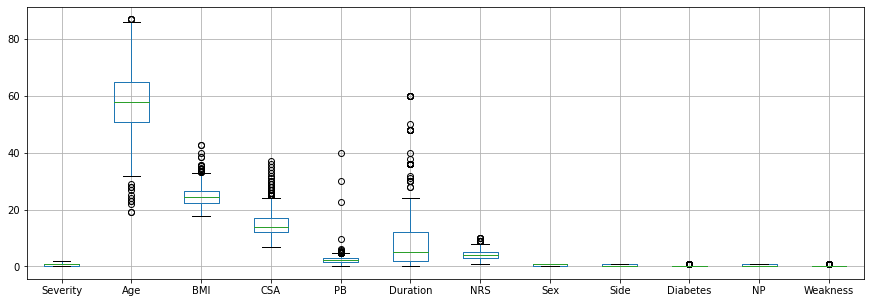

In [11]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df.boxplot(ax=ax);

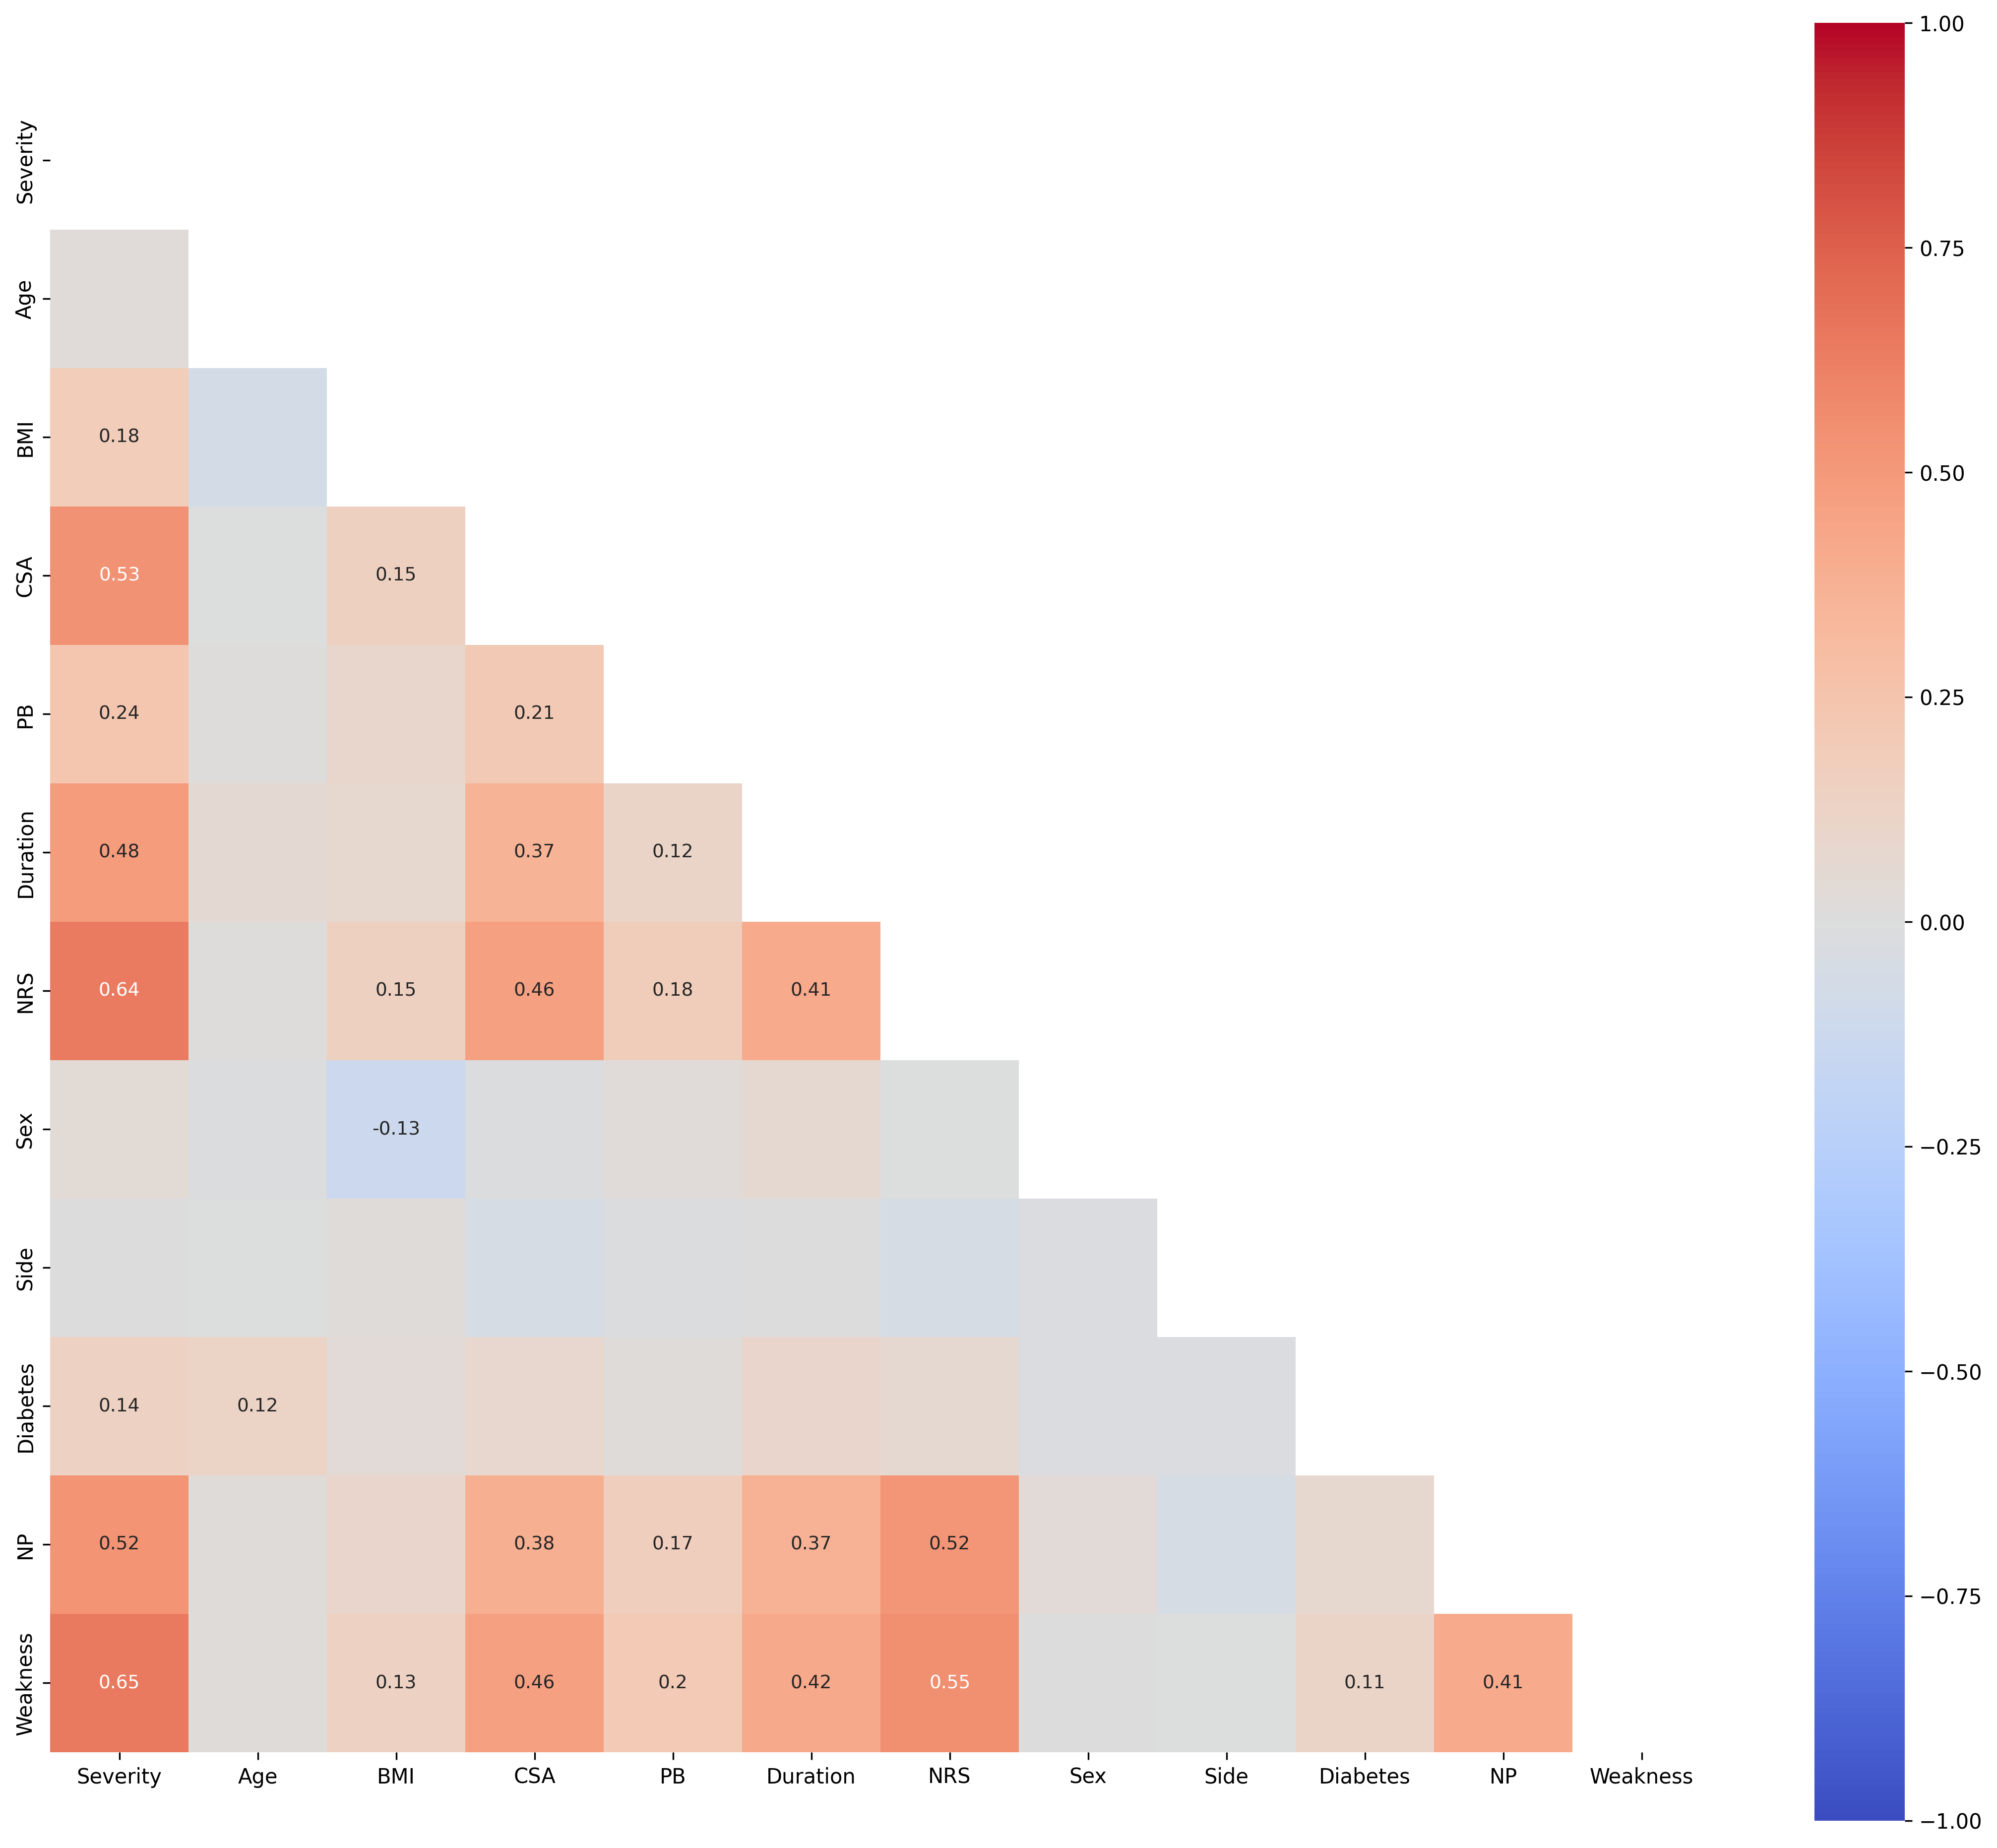

In [12]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [13]:
df_copy = df
print(df_copy.isnull().sum())

Severity    0
Age         0
BMI         0
CSA         0
PB          0
Duration    0
NRS         0
Sex         0
Side        0
Diabetes    0
NP          0
Weakness    0
dtype: int64


# Usunięcie obserwacji odstających

In [17]:
from scipy import stats

df_removed = df
numerical_only = df_standardized.loc[:, df_standardized.columns != 'Severity']
outliers = np.abs(stats.zscore(numerical_only)) < 3
df_removed = df_standardized[outliers.all(axis=1)]
df_removed.reset_index(drop=True, inplace=True)

df_removed

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,0.651714,-1.072510,-1.197444,-0.311441,-0.550318,2,1,1,0,0,0
1,2,0.929072,-1.271196,-0.500210,-0.366185,0.388643,6,0,0,0,0,0
2,0,0.929072,-1.271196,-0.500210,-0.530415,0.388643,3,0,1,0,0,0
3,0,0.466809,1.098399,-0.500210,0.235993,-0.758976,4,1,1,0,0,0
4,0,2.685670,-0.531962,-0.732621,-0.256698,-0.758976,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0.189452,-0.751695,-0.965033,-0.366185,-0.654647,3,1,1,0,0,0
986,2,-0.827526,-0.163961,0.197023,0.345480,-0.028673,5,1,0,0,1,1
987,0,-1.567146,-0.277518,-0.732621,-0.420928,-0.445989,4,0,0,0,0,0
988,0,0.836619,0.652866,-0.965033,0.783428,-0.028673,3,1,1,0,0,0


Usunięto 47 obserwacji odstających. Poniżej przedstawiono rozkłady, boxploty i macierz korelacji dla otrzymanych danych

C:\Users\Dodo\AppData\Local\Temp/ipykernel_12688/2498936444.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_removed.hist(ax=ax, bins=5);


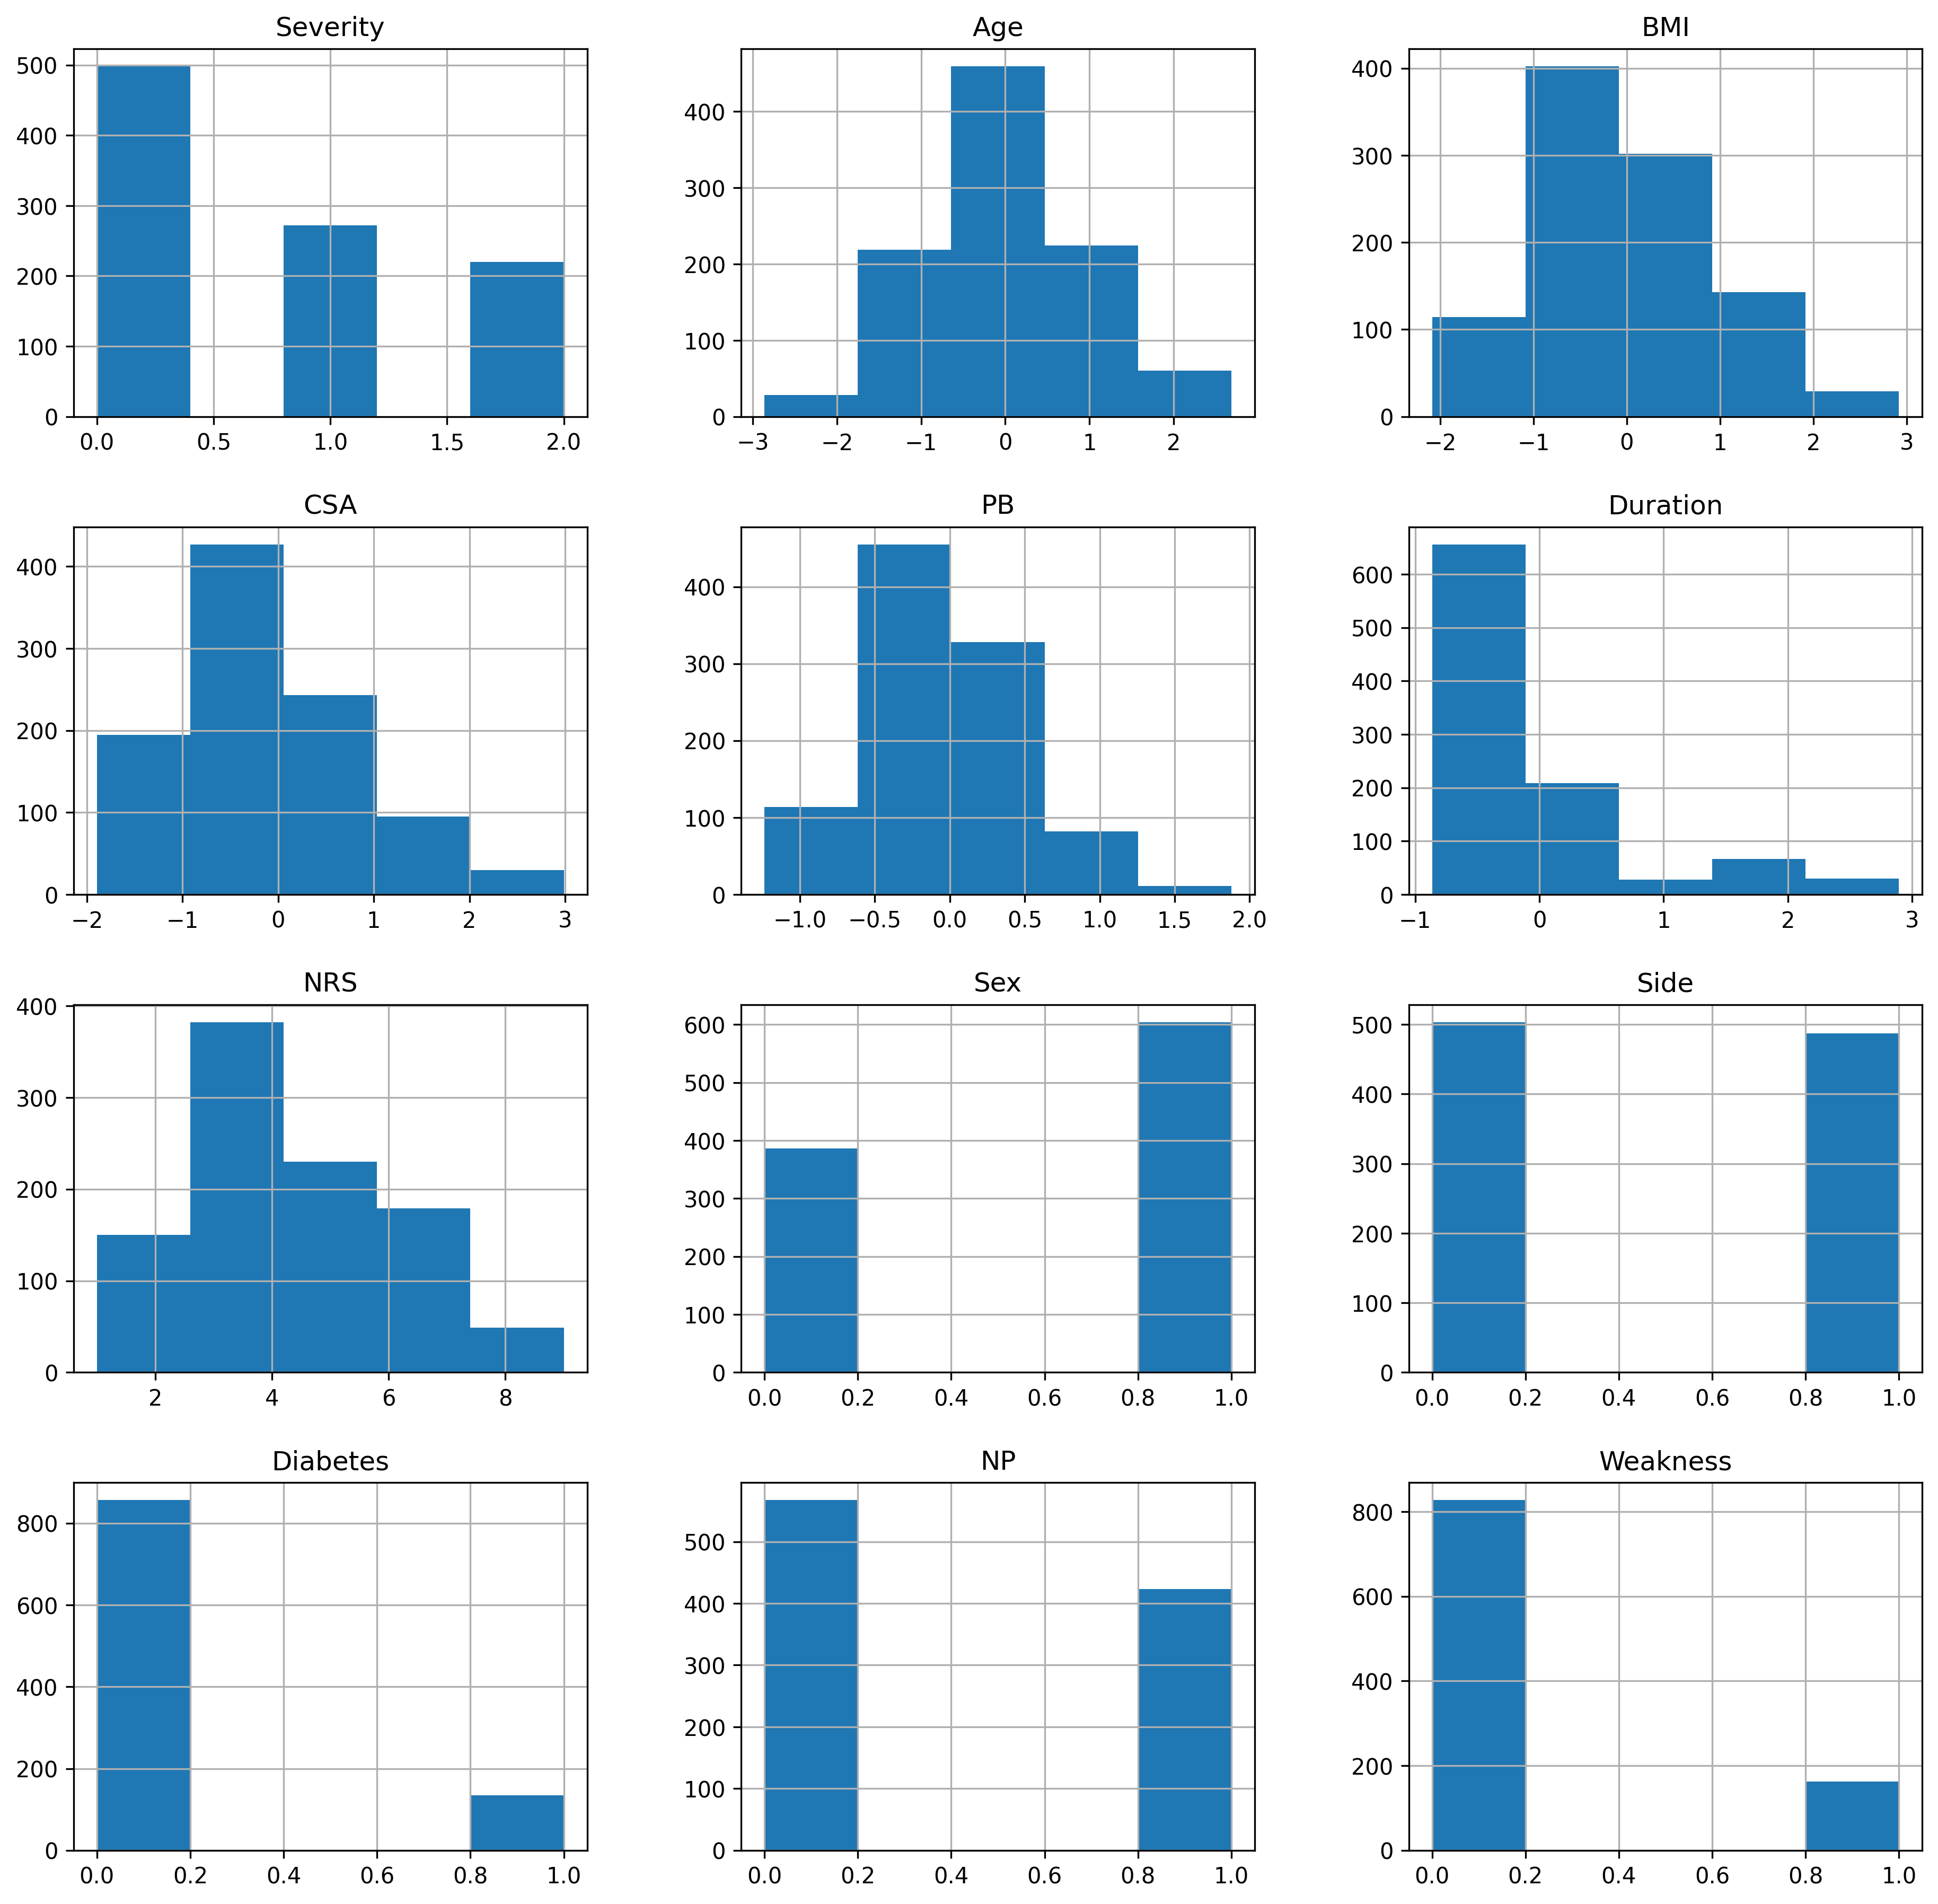

In [18]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df_removed.hist(ax=ax, bins=5);

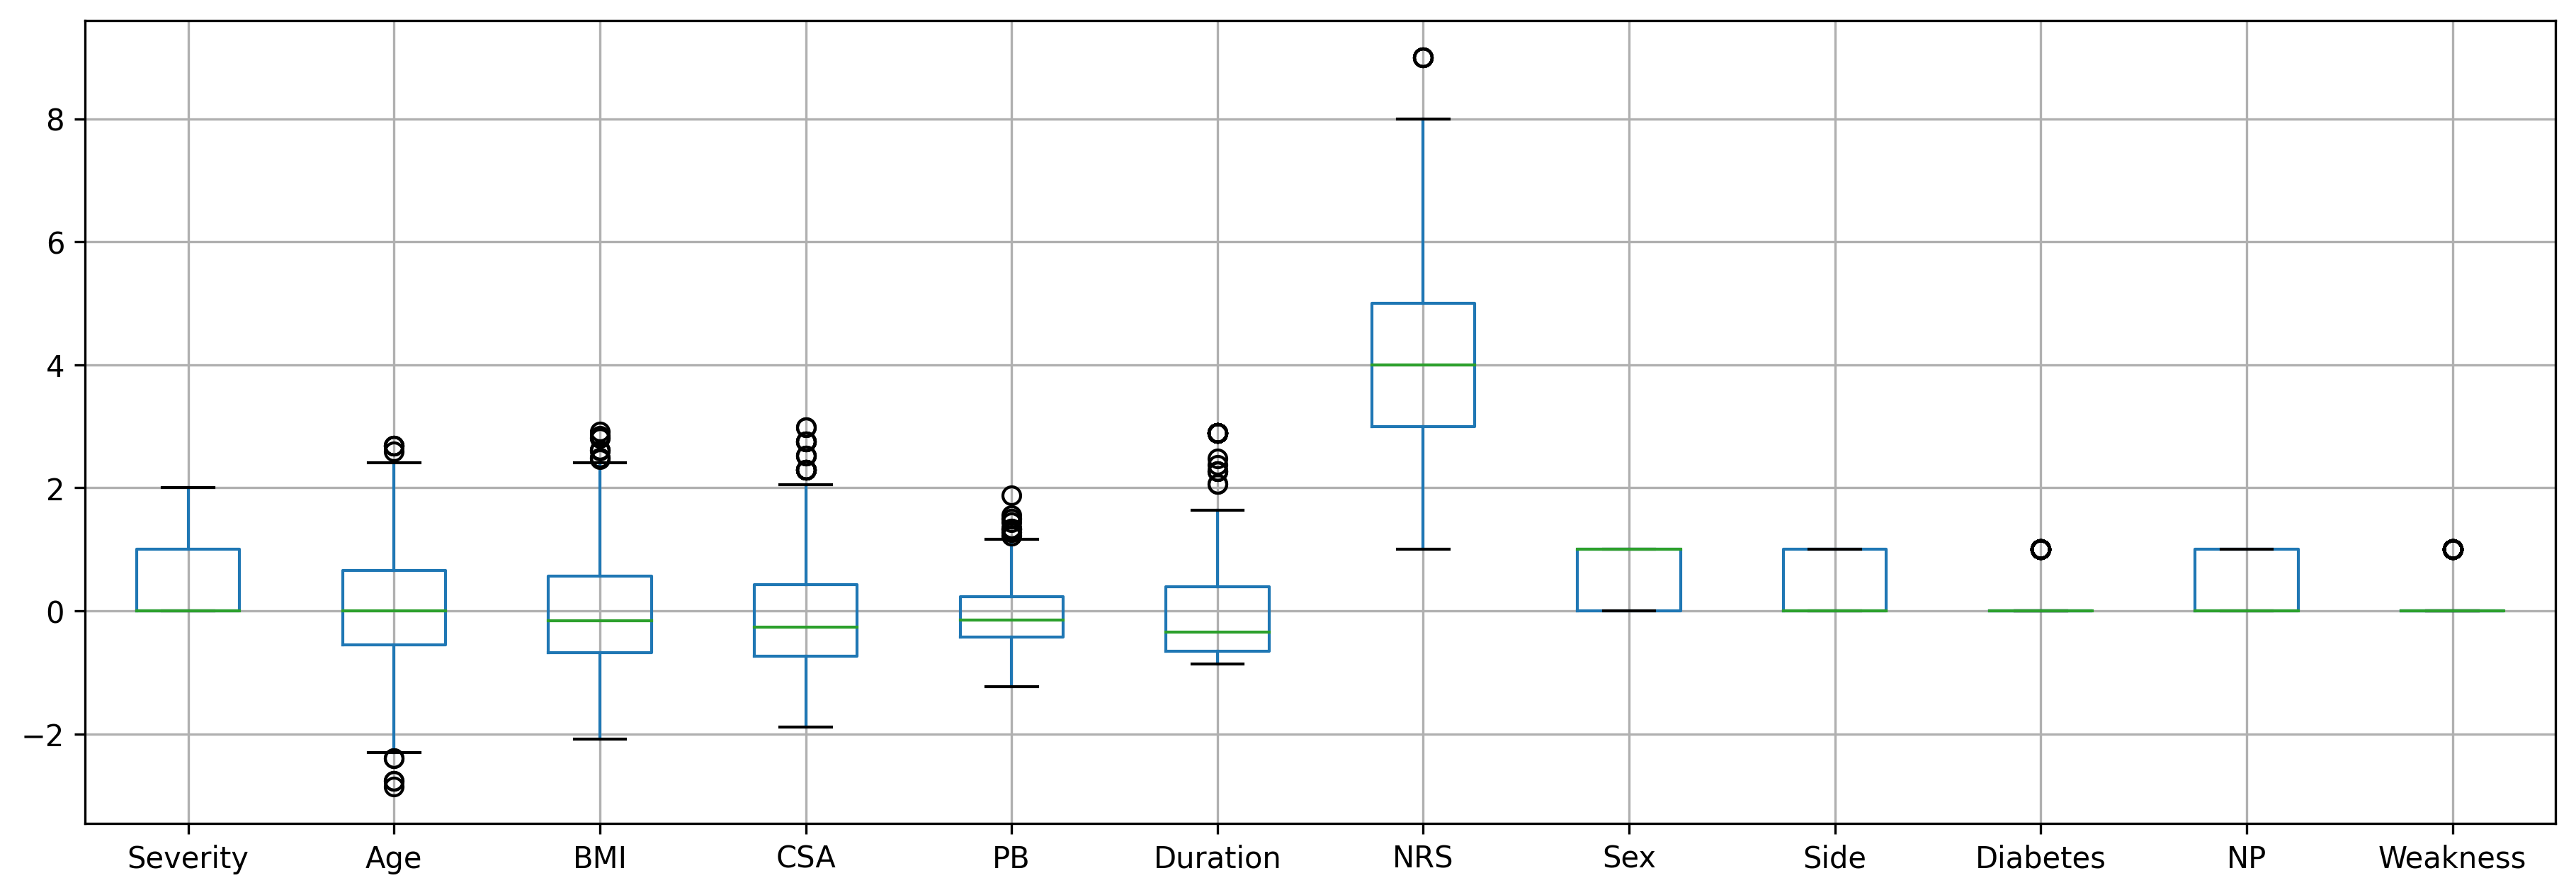

In [19]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df_removed.boxplot(ax=ax);

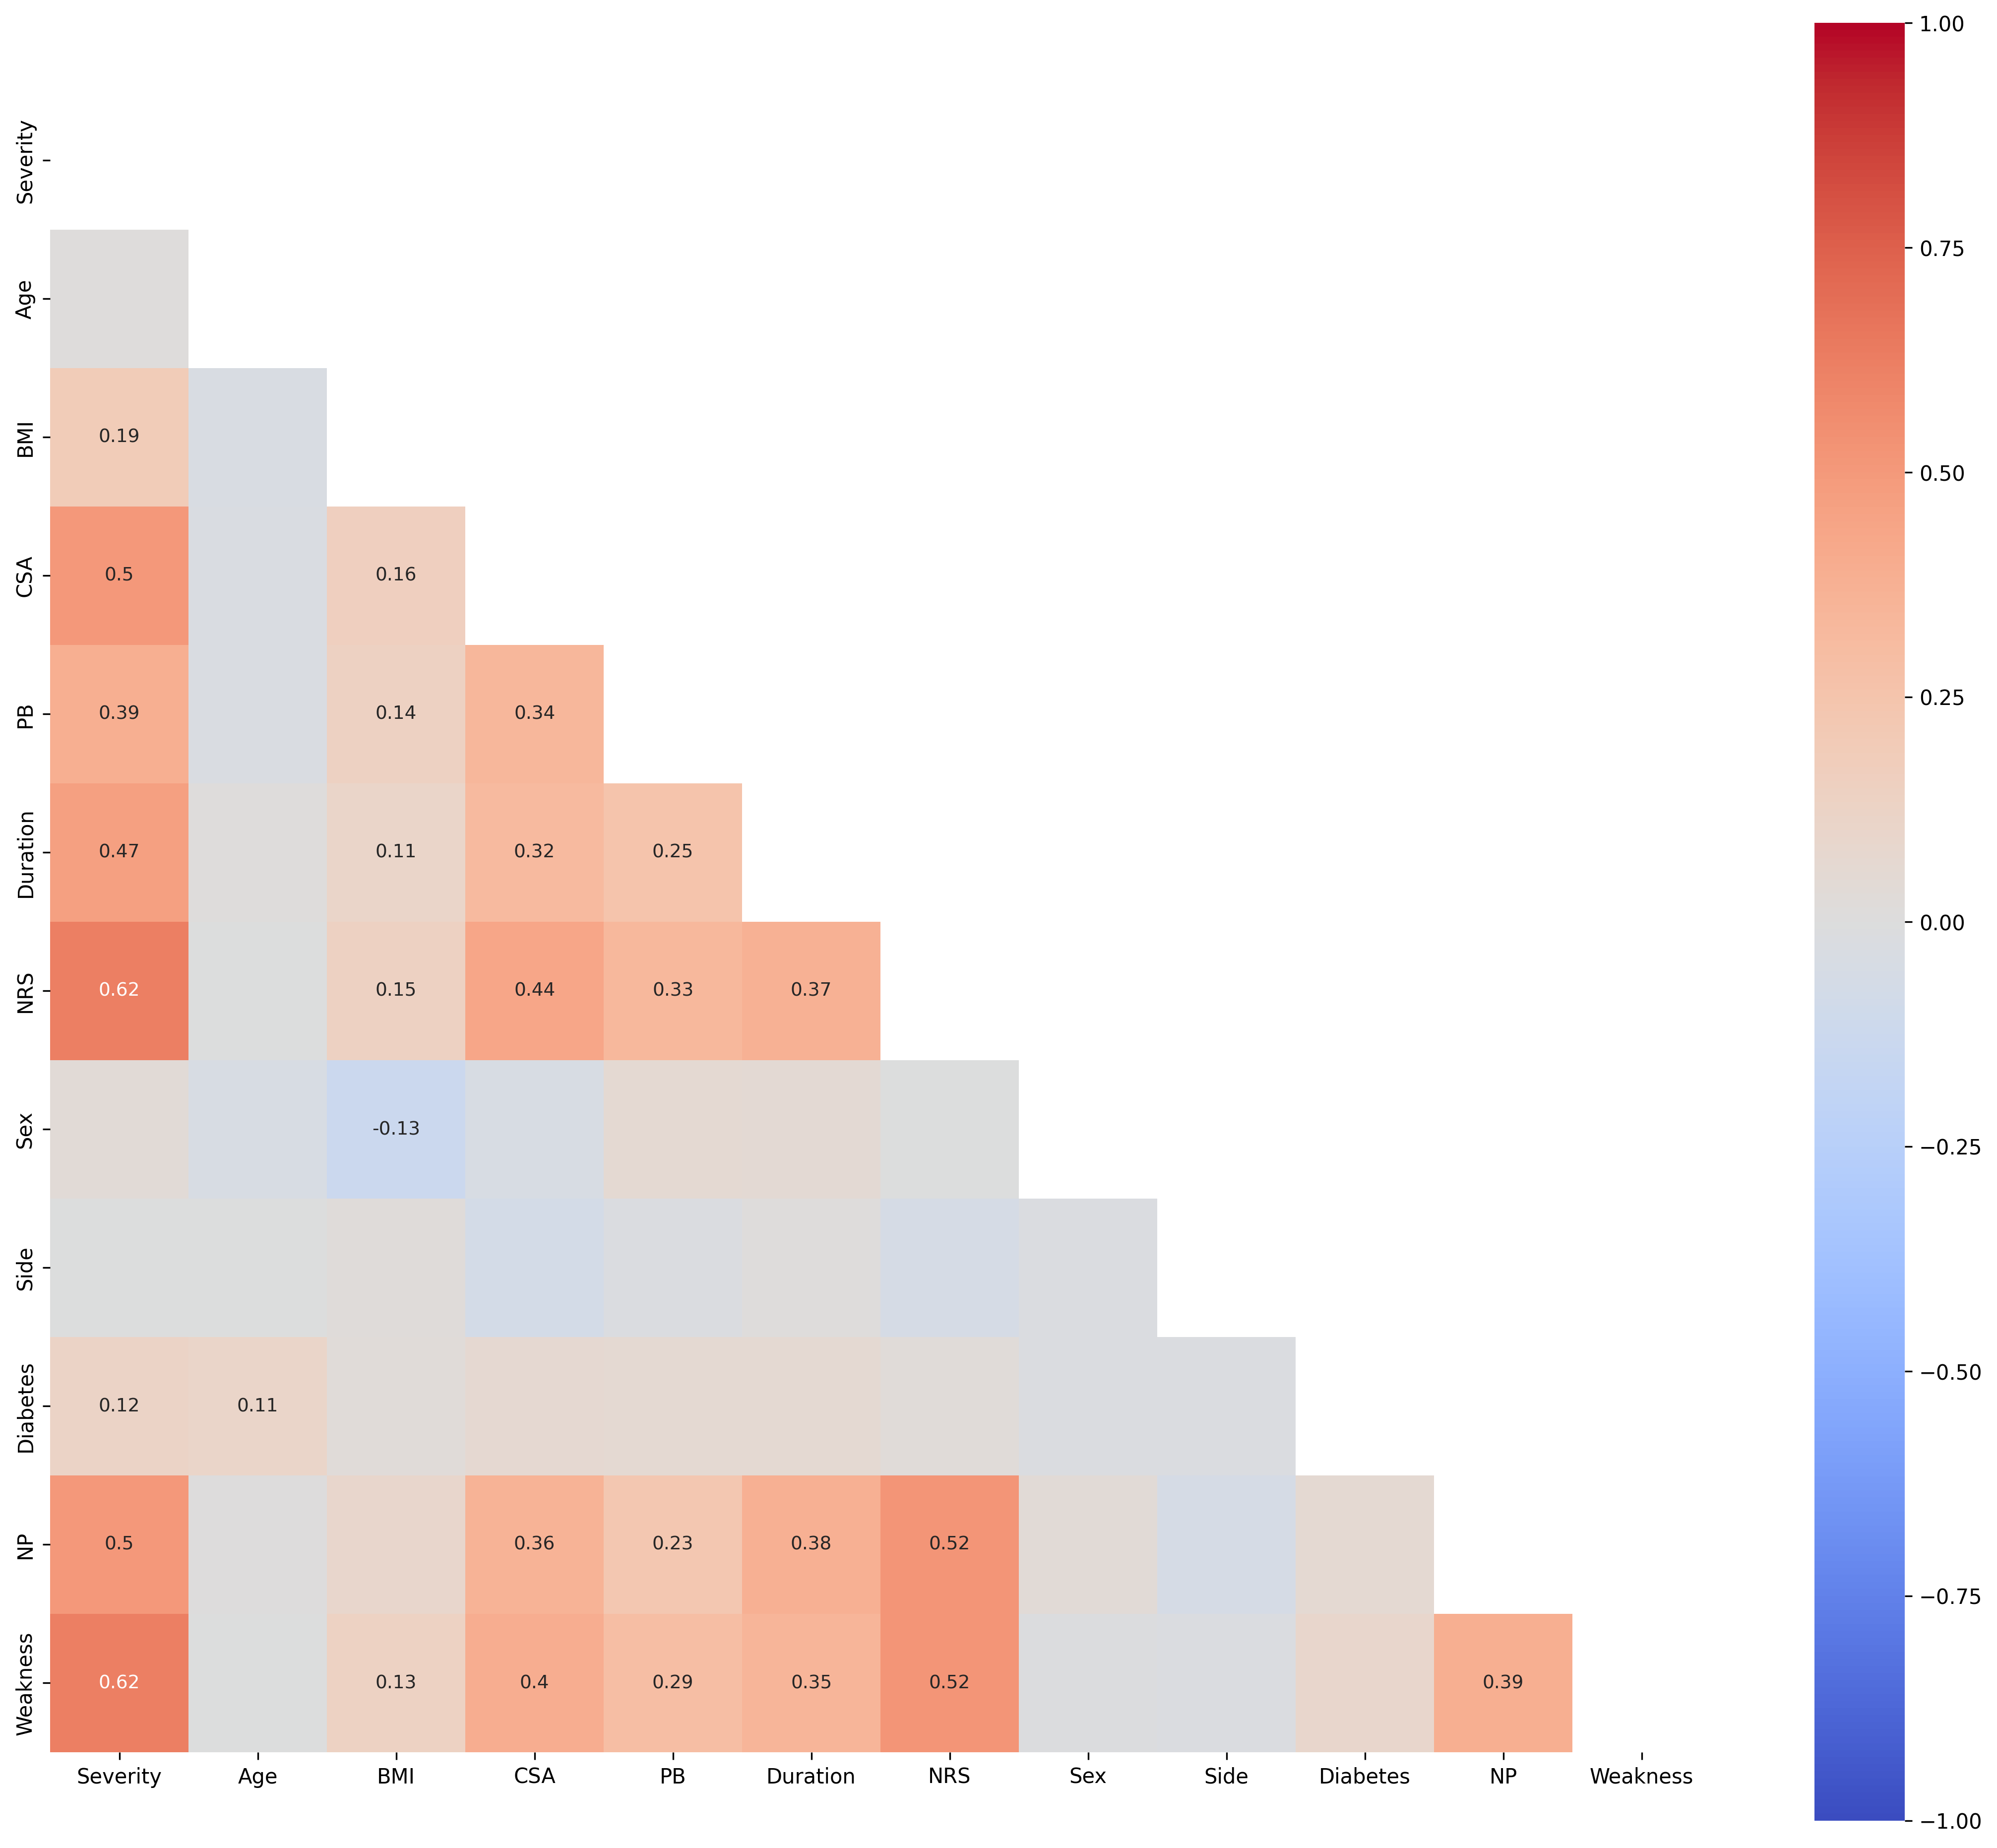

In [20]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df_removed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [14]:
df_adjusted

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.093750,10.0,1.9,3,2,1,1,0,0,0
1,2,68,20.415225,13.0,1.8,12,6,0,0,0,0,0
2,0,68,20.415225,13.0,1.5,12,3,0,1,0,0,0
3,0,63,28.507522,13.0,2.9,1,4,1,1,0,0,0
4,0,87,22.939751,12.0,2.0,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.189349,11.0,1.8,2,3,1,1,0,0,0
1033,2,49,24.196494,16.0,3.1,8,5,1,0,0,1,1
1034,0,41,23.808690,12.0,1.7,4,4,0,0,0,0,0
1035,0,67,26.986001,11.0,3.9,8,3,1,1,0,0,0


In [15]:
print(df['Age'].unique())
print(df['PB'].unique())
print(df['Duration'].unique())
print(df['NRS'].unique())
print('---------------------')
print(df['Side'].unique())
print(df['Diabetes'].unique())
print(df['NP'].unique())
print(df['Weakness'].unique())

[65 68 63 87 55 64 60 79 44 59 70 43 62 54 73 49 58 46 61 69 53 76 52 57
 50 72 74 71 67 45 38 77 33 82 22 66 75 48 56 51 81 41 86 78 40 36 47 83
 32 42 37 39 29 35 25 23 80 27 28 84 24 19]
[ 1.9   1.8   1.5   2.9   2.    2.3   4.5   3.4   2.7   3.3   1.2   2.4
  2.5   0.9   2.1   2.2   2.8   2.6   1.1   3.    3.8   3.2   4.    1.
  3.5   0.5   1.7   1.6   3.1   4.2   1.4   1.3   0.8   4.9   4.4  30.
  4.6   3.6   2.72  3.14 40.    4.89  2.61 22.8   4.8   5.2   5.1   3.9
  4.7   4.1   6.3   3.7   4.3   0.7   0.21  9.5   0.6   5.9   5.3 ]
[ 3 12  1  2  6  4  5  7 24  8  9 36 14 17 11 18 15 40 16 23 10 13  0 48
 60 22 31 28 38 30 20 32 50]
[ 2  6  3  4  5  1  7  8  9 10]
---------------------
[1 0]
[0 1]
[0 1]
[0 1]


## Standardyzacja

In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_removed)

quality_vars_indexes = [0, 6, 7, 8, 9, 10, 11]
quality_vars_names = ['Severity', 'NRS', 'Sex', 'Side', 'Diabetes', 'NP', 'Weakness']

df_standardized = pd.DataFrame(scaler.transform(df_removed))
for i in range(len(quality_vars_indexes)):
    df_standardized[quality_vars_indexes[i]] = df_copy[quality_vars_names[i]]

df_standardized.rename(columns=col_mapper, inplace=True)

df_standardized

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,0.655854,-1.111116,-1.266154,-0.523387,-0.572497,2,1,1,0,0,0
1,2,0.946237,-1.323798,-0.482623,-0.637553,0.562308,6,0,0,0,0,0
2,0,0.946237,-1.323798,-0.482623,-0.980051,0.562308,3,0,1,0,0,0
3,0,0.462266,1.212711,-0.482623,0.618272,-0.824676,4,1,1,0,0,0
4,0,2.785328,-0.532492,-0.743800,-0.409221,-0.824676,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0.171883,-0.767704,-1.004977,-0.637553,-0.698586,2,0,1,0,0,0
986,0,-0.892854,-0.138569,0.300907,0.846603,0.057950,3,0,0,1,0,0
987,1,-1.667207,-0.260125,-0.743800,-0.751719,-0.446407,6,1,0,0,1,0
988,0,0.849443,0.735794,-1.004977,1.759930,0.057950,3,1,1,0,0,0


# Ekstrakcja cech

Minimum zmiennych dla wariancji > 95%: 8
Minimum zmiennych dla wariancji > 99%: 10
Minimum zmiennych dla wariancji > 99.9%: 10


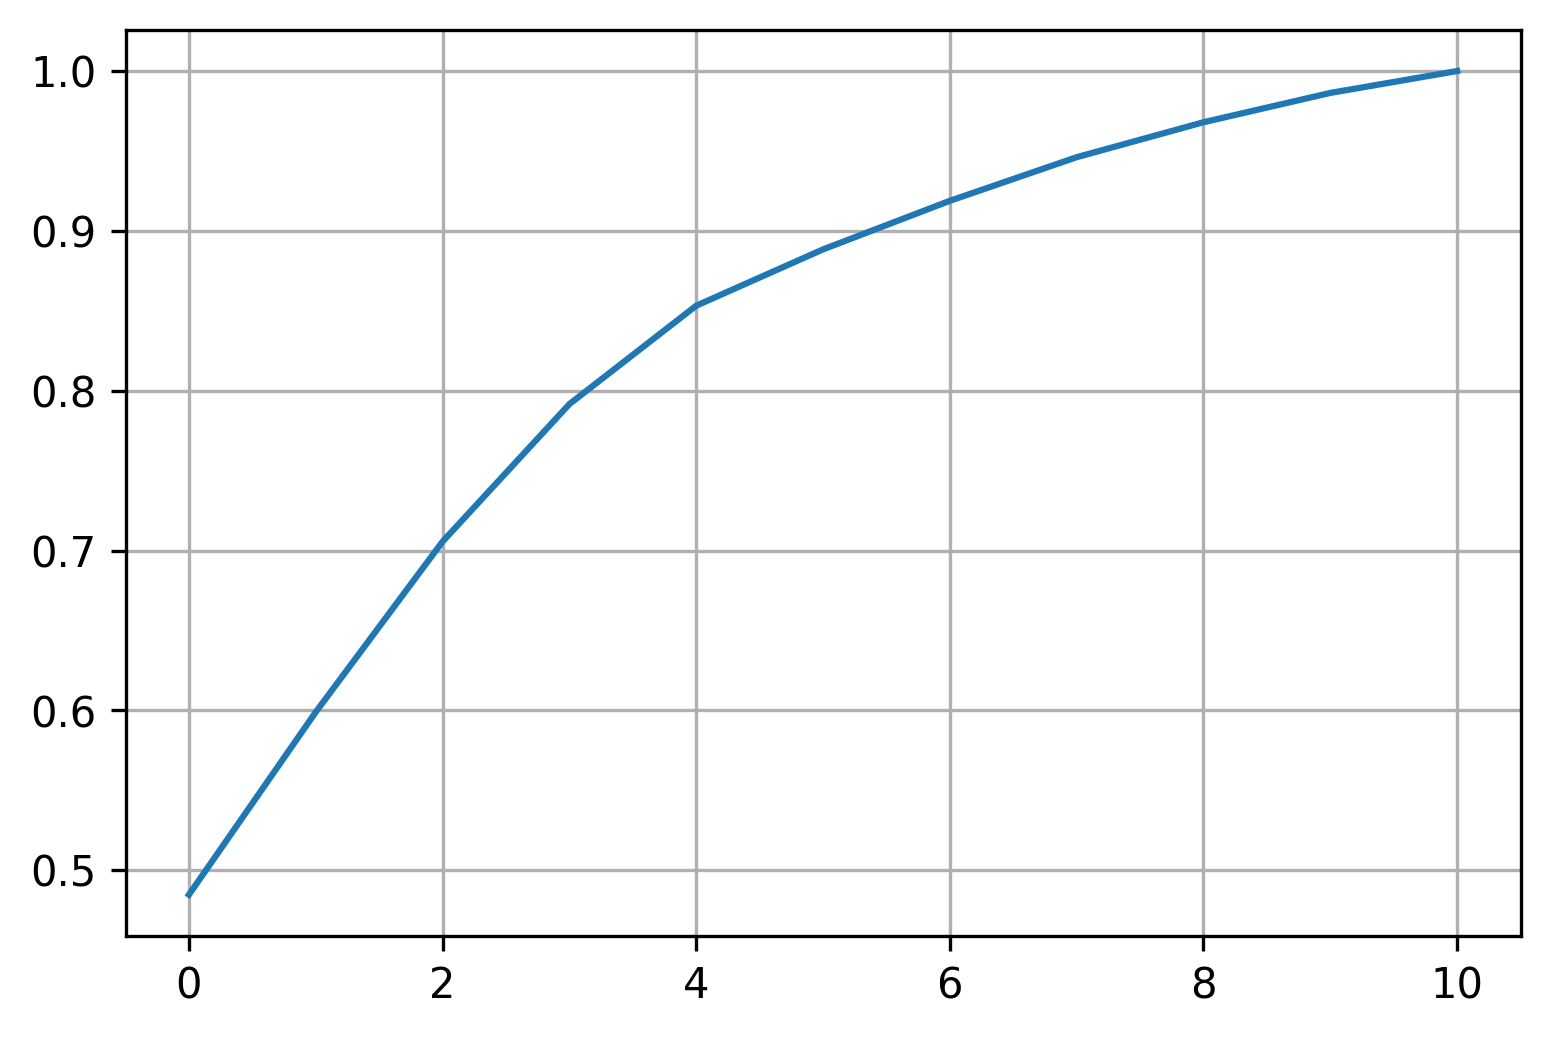

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca.fit(df_removed.iloc[:,0:11])

cev = pca.explained_variance_ratio_.cumsum()

plt.grid()
plt.plot(cev)
plt.savefig('variance.png')

print(f'Minimum zmiennych dla wariancji > 95%: {np.argmax(cev > 0.95)}')
print(f'Minimum zmiennych dla wariancji > 99%: {np.argmax(cev > 0.99)}')
print(f'Minimum zmiennych dla wariancji > 99.9%: {np.argmax(cev > 0.999)}')

In [29]:
pca2 = PCA(n_components=10)

df_reduced = pd.DataFrame(pca2.fit_transform(df_removed.iloc[:,0:10]))
df_reduced = df_reduced.join(df_removed['Severity'])

df_reduced

,0,1,2,3,4,5,6,7,8,9,Severity
0,-2.791644,-0.942262,-0.366046,0.131193,0.356279,-0.388676,0.231135,-0.375502,-0.013696,-0.115620,0
1,1.703457,-1.576702,-0.697092,0.206444,0.492439,-0.396973,-0.136246,1.203367,-0.306757,-0.292215,2
2,-1.578573,-1.265314,-0.226983,0.641065,0.467633,0.542928,0.828273,0.286862,-0.048514,-0.126708,0
3,-0.608118,0.095778,0.802713,-1.166392,-0.127085,-0.070942,0.157403,-0.847102,0.327884,-0.068334,0
4,-2.650455,-2.371375,1.131893,-0.054349,-0.271413,-0.056678,-0.663676,-0.195371,-0.030444,-0.232153,0
...,...,...,...,...,...,...,...,...,...,...,...
985,-1.839928,-0.501687,-0.587076,-0.259005,0.171756,-0.221563,0.272162,-0.467247,-0.108805,-0.066579,0
986,1.109587,0.688410,-0.460573,0.479890,-0.057217,-0.879669,-0.688843,0.242386,0.002823,-0.225684,2
987,-0.784789,1.134487,-1.234173,-0.546231,0.099322,0.588810,-0.103636,0.673477,0.008700,-0.032285,0
988,-1.454645,-0.312412,0.976961,-0.461364,0.646204,-0.177395,0.054556,-0.788970,0.916856,-0.127828,0
